# 爬虫笔记2-基本库的使用

## 1.urllib

### 1.1urlopen

In [1]:
import urllib.request
#GET模式
response=urllib.request.urlopen('https://www.python.org')
print(type(response))
print(response.status)#状态码
print(response.getheaders())#头信息
print(response.getheader('Server'))

<class 'http.client.HTTPResponse'>
200
[('Connection', 'close'), ('Content-Length', '50705'), ('Server', 'nginx'), ('Content-Type', 'text/html; charset=utf-8'), ('X-Frame-Options', 'DENY'), ('Via', '1.1 vegur, 1.1 varnish, 1.1 varnish'), ('Accept-Ranges', 'bytes'), ('Date', 'Sat, 04 Dec 2021 08:56:49 GMT'), ('Age', '1607'), ('X-Served-By', 'cache-bwi5181-BWI, cache-hkg17935-HKG'), ('X-Cache', 'HIT, HIT'), ('X-Cache-Hits', '1, 4598'), ('X-Timer', 'S1638608210.624516,VS0,VE0'), ('Vary', 'Cookie'), ('Strict-Transport-Security', 'max-age=63072000; includeSubDomains')]
nginx


In [2]:
import urllib.parse
#POST模式-data参数
#传递一个参数word，值是hello
#bytes转化变量类型：第一个参数是str类型，第二个参数指定编码格式。返回bytes类型
#parse.urlencode：将字典转化为字符串

data=bytes(urllib.parse.urlencode({'word':'hello'}),encoding='utf8')
response=urllib.request.urlopen('http://httpbin.org/post',data=data)
print(response.read())

#可以看到结果有"form": {\n    "word": "hello"\n  }，说明POST成功

b'{\n  "args": {}, \n  "data": "", \n  "files": {}, \n  "form": {\n    "word": "hello"\n  }, \n  "headers": {\n    "Accept-Encoding": "identity", \n    "Content-Length": "10", \n    "Content-Type": "application/x-www-form-urlencoded", \n    "Host": "httpbin.org", \n    "User-Agent": "Python-urllib/3.7", \n    "X-Amzn-Trace-Id": "Root=1-61ab2d52-2715a24852cf252905e8406d"\n  }, \n  "json": null, \n  "origin": "115.27.200.245", \n  "url": "http://httpbin.org/post"\n}\n'


In [3]:
#timeout参数 设置超时时间，单位为s
#response=urllib.request.urlopen('http://httpbin.org/get',timeout=0.1)
#print(response.read())
#抛出了<urlopen error timed out>异常

In [4]:
#利用timeout来控制一个页面如果长时间未响应，就跳过它的抓取
import socket
try:
    response=urllib.request.urlopen('http://httpbin.org/get',timeout=0.1)
except urllib.error.URLError as e:
    if isinstance(e.reason,socket.timeout):
        print('TIME OUT')

TIME OUT


### 1.2Request类

如果在请求中需要加入Headers等信息，可以用Request类来构建。

In [5]:
'''
class urllib. request. Request ( url, data=None, 
headers={}, origin_req_host=None, unverifiable=False, method =None)
data必须是bytes类型的，如果是字典，必须用urllib.parse.urlencode()编码成bytes
headers是请求头，常用于修改User-Agent伪装成浏览器。
    默认是Python-urllib，可以修改为火狐浏览器：Mozilla/s.o (X11; U; Linux i686) Gecko/20071127 Firefox/2.0.0.1
    谷歌浏览器：Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36
    在地址栏输入about:version即可看到浏览器的UA
'''
url='https://bilibili.com'
headers={
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36'
    #'Host':"bilibili.com"
}
request=urllib.request.Request(url=url,headers=headers)
response=urllib.request.urlopen(request)
print(response.read().decode('utf-8'))
#这样就能爬到b站首页了。不用UA会被拒绝访问。

<!DOCTYPE html><html lang="zh-CN"><head><meta charset="utf-8"><title>哔哩哔哩 (゜-゜)つロ 干杯~-bilibili</title><meta name="description" content="bilibili是国内知名的视频弹幕网站，这里有及时的动漫新番，活跃的ACG氛围，有创意的Up主。大家可以在这里找到许多欢乐。"><meta name="keywords" content="Bilibili,哔哩哔哩,哔哩哔哩动画,哔哩哔哩弹幕网,弹幕视频,B站,弹幕,字幕,AMV,MAD,MTV,ANIME,动漫,动漫音乐,游戏,游戏解说,二次元,游戏视频,ACG,galgame,动画,番组,新番,初音,洛天依,vocaloid,日本动漫,国产动漫,手机游戏,网络游戏,电子竞技,ACG燃曲,ACG神曲,追新番,新番动漫,新番吐槽,巡音,镜音双子,千本樱,初音MIKU,舞蹈MMD,MIKUMIKUDANCE,洛天依原创曲,洛天依翻唱曲,洛天依投食歌,洛天依MMD,vocaloid家族,OST,BGM,动漫歌曲,日本动漫音乐,宫崎骏动漫音乐,动漫音乐推荐,燃系mad,治愈系mad,MAD MOVIE,MAD高燃"><meta name="renderer" content="webkit"><meta http-equiv="X-UA-Compatible" content="IE=edge"><meta name="spm_prefix" content="333.851"><meta name="referrer" content="no-referrer-when-downgrade"><meta name="baidu-site-verification" content="code-qkzzf7NQkQ"><link rel="dns-prefetch" href="//s1.hdslb.com"><link rel="apple-touch-icon" href="//static.hdslb.com/mobile/img/512.png"><link rel="shortcut icon" href="/favicon.ico?v=1"><!-- <style>
    @media 

### 1.3 高级用法

Handler是处理器。urllib提供了各种Hander，使用很方便。

基类：BaseHandler

子类：HTTPDefaultErrorHandler，HTTPRedirectHandler，HTTPCookieProcessor，ProxyHandler等

另一个类是OpenerDirector，有open()方法。

使用Handler来构建Opener，从而实现一些高级用法。


#### 1.3.1 登陆

许多网站打开时会要求输入用户名和密码，登陆后才能查看页面，比如：

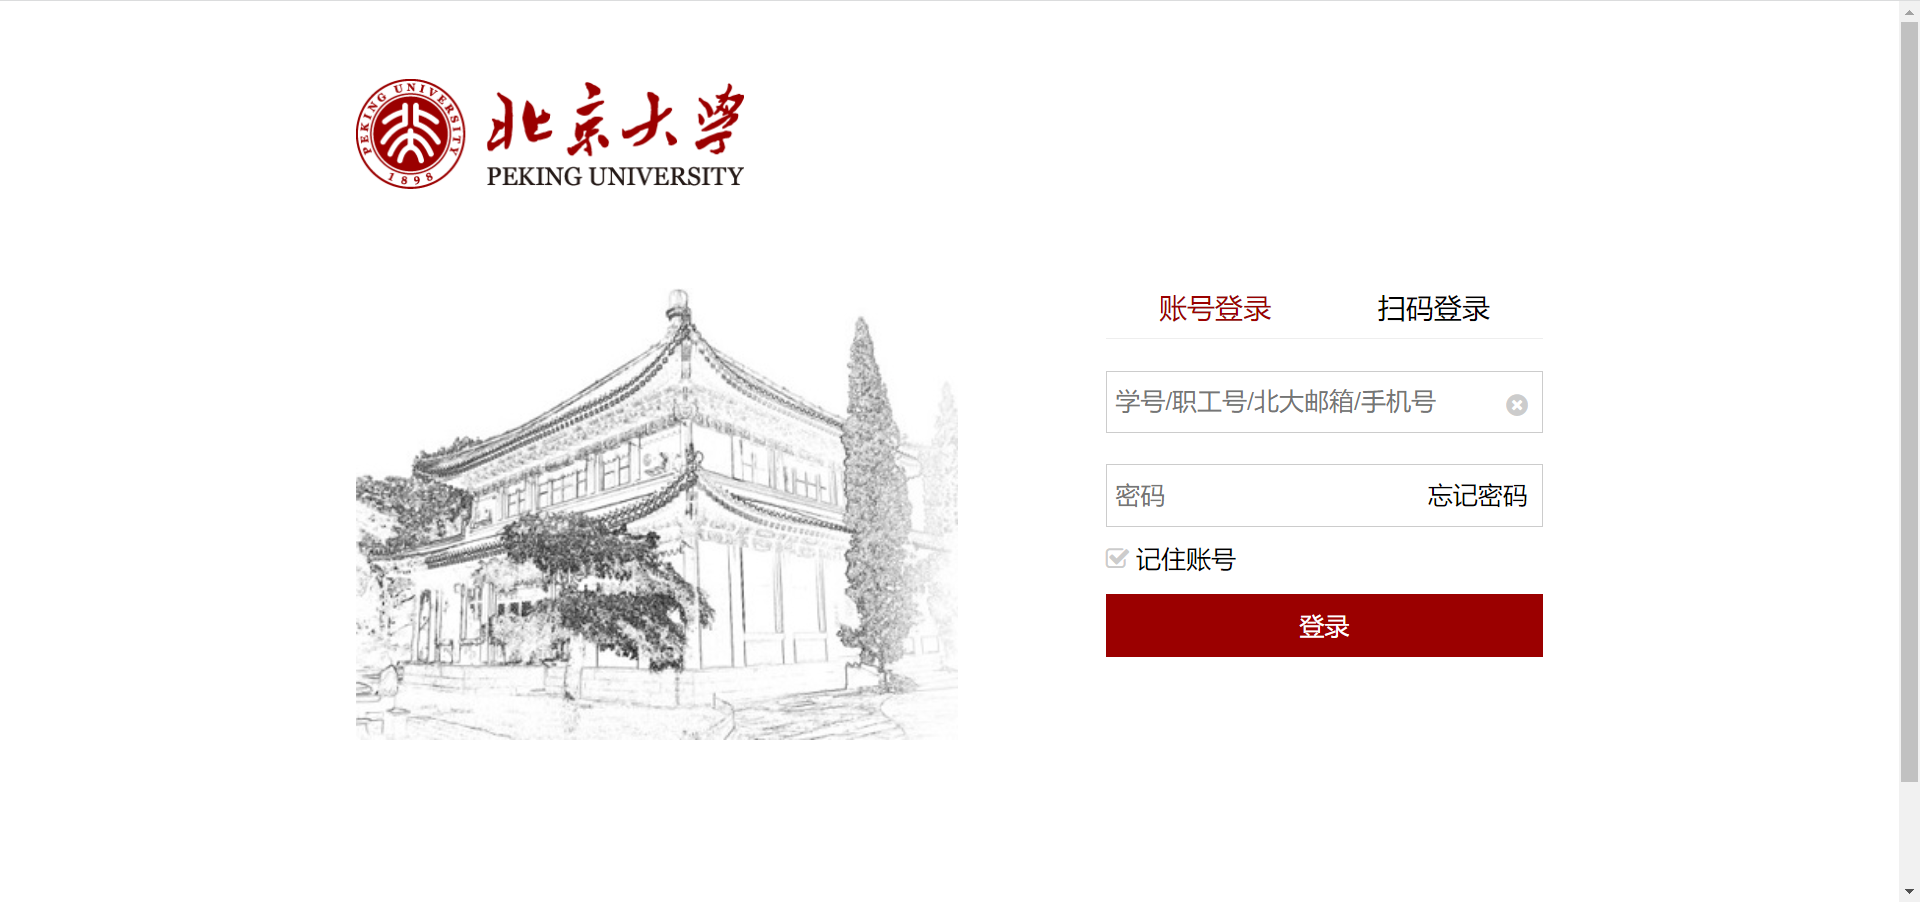

用HTTPPasswordMgrWithDefaultRealm子类

In [6]:
from urllib.request import HTTPPasswordMgrWithDefaultRealm, HTTPBasicAuthHandler, build_opener
from urllib.error import URLError

username='1800011778'
password=''
url='https://iaaa.pku.edu.cn/iaaa/oauth.jsp?appID=portal2017&appName=%E5%8C%97%E4%BA%AC%E5%A4%A7%E5%AD%A6%E6%A0%A1%E5%86%85%E4%BF%A1%E6%81%AF%E9%97%A8%E6%88%B7%E6%96%B0%E7%89%88&redirectUrl=https%3A%2F%2Fportal.pku.edu.cn%2Fportal2017%2FssoLogin.do'
p=HTTPPasswordMgrWithDefaultRealm() #声明对象
p.add_password(None,url,username,password)
auth_handler=HTTPBasicAuthHandler(p)
opener=build_opener(auth_handler) #用handler建立opener

try:
    result=opener.open(url)
    html=result.read().decode('utf-8')
    print(html)
except URLError as e:
    print(e.reason)




<!DOCTYPE HTML>
<html>
<head>
<meta name="viewport" content="width=device-width, initial-scale=1.0,minimum-scale=1.0,maximum-scale=1.0"/>
<meta http-equiv="Content-Type" content="text/html; charset=UTF-8">
<meta http-equiv="X-UA-Compatible" content="IE=edge;chrome=1" />
<link rel="stylesheet" type="text/css" href="./resources/css/login.css" />
<link href="./resources/css/font-awesome.min.css" rel="stylesheet" type="text/css">
<link rel="stylesheet" type="text/css" href="./resources/css/login.css" />
<script type="text/javascript" src="./resources/javascript/jquery-1.10.2.min.js"></script>
<script type="text/javascript" src="./resources/javascript/OAuthLogin.js?_v=20201211"></script>
<script type="text/javascript" src="./resources/javascript/OAuthRefresh.js"></script>
<script type="text/javascript">
	redirectURL = "https://portal.pku.edu.cn/portal2017/ssoLogin.do";
	redirectLogonURL = "null";	
</script>
<title>北京大学统一身份认证</title>
</head>
<body onload="focusName()">
   <div class="main">

#### 1.3.2 代理

子类ProxyHandle

In [7]:
from urllib.request import ProxyHandler
proxy_handler=ProxyHandler({
    #从网上随便找的两个地址，https://ip.ihuan.me/?page=4ce63706
    'http':'http://185.228.26.28:80',
    'https':'https://186.101.113.58:10101'
})
opener=build_opener(proxy_handler)
try:
    response=opener.open('https://www.bilibili.com')
    print(response.read().decode ('utf-8'))
except URLError as e:
    print(e.reason)

[WinError 10060] 由于连接方在一段时间后没有正确答复或连接的主机没有反应，连接尝试失败。


#### 1.3.3 Cookies


In [8]:
#获取Cookies
import http.cookiejar

cookie=http.cookiejar.CookieJar() #声明对象
handler=urllib.request.HTTPCookieProcessor(cookie)
opener=urllib.request.build_opener(handler)
response=opener.open('https://www.bilibili.com')
for item in cookie:
    print(item.name+'='+item.value)

innersign=0
buvid3=67CD11AE-0053-B53E-624D-E0F738E8B1BF32881infoc
main_confirmation=Q81RUngDqroUm2aLkqzQ7lrcY2gig6ybDesLxCA4/oI=


In [9]:
#保存Cookies到文件
filename='cookies.txt'
cookie=http.cookiejar.MozillaCookieJar(filename) #声明对象，和获取过程唯一的区别就是cookie类不同
handler=urllib.request.HTTPCookieProcessor(cookie)
opener=urllib.request.build_opener(handler)
response=opener.open('https://www.bilibili.com')
cookie.save(ignore_discard=True,ignore_expires=True)

在cookies.txt的文件是这样的：
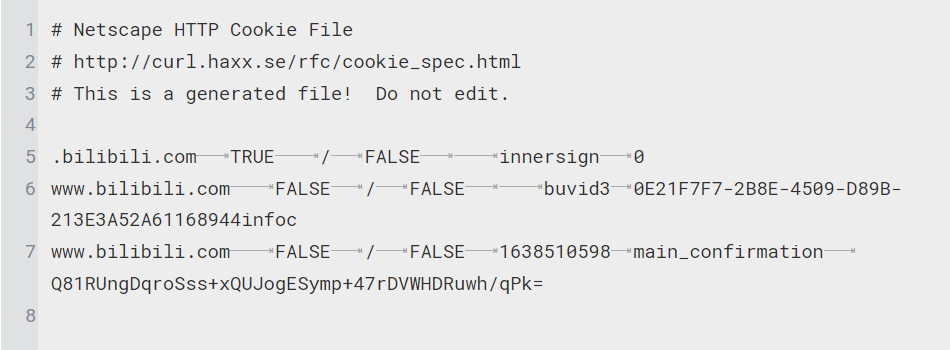

In [10]:
#读取Cookies
cookie=http.cookiejar.MozillaCookieJar()#声明对象
cookie.load('cookies.txt',ignore_discard=True, ignore_expires=True)
handler=urllib.request.HTTPCookieProcessor(cookie)
opener=urllib.request.build_opener(handler)
response=opener.open('https://www.bilibili.com')
print (response.read().decode('utf-8'))

<!DOCTYPE html><html lang="zh-CN"><head><meta charset="utf-8"><title>哔哩哔哩 (゜-゜)つロ 干杯~-bilibili</title><meta name="description" content="bilibili是国内知名的视频弹幕网站，这里有及时的动漫新番，活跃的ACG氛围，有创意的Up主。大家可以在这里找到许多欢乐。"><meta name="keywords" content="Bilibili,哔哩哔哩,哔哩哔哩动画,哔哩哔哩弹幕网,弹幕视频,B站,弹幕,字幕,AMV,MAD,MTV,ANIME,动漫,动漫音乐,游戏,游戏解说,二次元,游戏视频,ACG,galgame,动画,番组,新番,初音,洛天依,vocaloid,日本动漫,国产动漫,手机游戏,网络游戏,电子竞技,ACG燃曲,ACG神曲,追新番,新番动漫,新番吐槽,巡音,镜音双子,千本樱,初音MIKU,舞蹈MMD,MIKUMIKUDANCE,洛天依原创曲,洛天依翻唱曲,洛天依投食歌,洛天依MMD,vocaloid家族,OST,BGM,动漫歌曲,日本动漫音乐,宫崎骏动漫音乐,动漫音乐推荐,燃系mad,治愈系mad,MAD MOVIE,MAD高燃"><meta name="renderer" content="webkit"><meta http-equiv="X-UA-Compatible" content="IE=edge"><meta name="spm_prefix" content="333.851"><meta name="referrer" content="no-referrer-when-downgrade"><meta name="baidu-site-verification" content="code-qkzzf7NQkQ"><link rel="dns-prefetch" href="//s1.hdslb.com"><link rel="apple-touch-icon" href="//static.hdslb.com/mobile/img/512.png"><link rel="shortcut icon" href="/favicon.ico?v=1"><!-- <style>
    @media 

### 1.2 error
error模块定义了request模块产生的异常，包含URLError和HTTPError两种。

#### 1.2.1 URLError
URLError.reason 报告request模块错误原因

In [11]:
from urllib import request,error
try:
    response = request.urlopen('http://rojic12138.com/123')
except error.URLError as e:
    print(e.reason)

Not Found


#### 1.2.2 HTTPError
处理HTTP请求错误，有三个属性：code（状态码）,reason,headers（请求头）


In [12]:
try:
    response = request.urlopen('http://rojic12138.com/123')
except error.HTTPError as e:
    print(e.reason,e.code,e.headers,sep='\n')

Not Found
404
Date: Sat, 04 Dec 2021 08:57:14 GMT
Server: Apache
X-Frame-Options: SAMEORIGIN
X-Powered-By: PHP/7.3.12
Expires: Wed, 11 Jan 1984 05:00:00 GMT
Cache-Control: no-cache, must-revalidate, max-age=0
Link: <http://rojic12138.com/wp-json/>; rel="https://api.w.org/"
Connection: close
Transfer-Encoding: chunked
Content-Type: text/html; charset=UTF-8




URLError是HTTPError的父类，一般先捕获子类的错误，再捕获父类的错误。

In [13]:
try:
    response = request.urlopen('http://rojic12138.com/123')
except error.HTTPError as e:
    print(e.reason,e.code,e.headers,sep='\n')
except error.URLError as e:
    print(e.reason)
else:
    print('Request Successfully')

Not Found
404
Date: Sat, 04 Dec 2021 08:57:14 GMT
Server: Apache
X-Frame-Options: SAMEORIGIN
X-Powered-By: PHP/7.3.12
Expires: Wed, 11 Jan 1984 05:00:00 GMT
Cache-Control: no-cache, must-revalidate, max-age=0
Link: <http://rojic12138.com/wp-json/>; rel="https://api.w.org/"
Connection: close
Transfer-Encoding: chunked
Content-Type: text/html; charset=UTF-8




reason属性不一定是字符串，也可能是一个对象。这时用isinstance(reason,错误类型)来判断。比如之前timeout的例子：


In [14]:
try:
    response=urllib.request.urlopen('http://httpbin.org/get',timeout=0.1)
except urllib.error.URLError as e:
    print(type(e.reason))
    if isinstance(e.reason,socket.timeout):
        print('TIME OUT')

<class 'socket.timeout'>
TIME OUT


### 1.3 parse
parse模块定义了处理url的各种接口。

#### 1.3.1 urlparse

In [15]:
from urllib.parse import urlparse
#b站搜索“这个好诶”
result=urlparse('https://search.bilibili.com/all?keyword=%E8%BF%99%E4%B8%AA%E5%A5%BD%E8%AF%B6&from_source=webtop_search&spm_id_from=333.851')
print(type(result),result)

<class 'urllib.parse.ParseResult'> ParseResult(scheme='https', netloc='search.bilibili.com', path='/all', params='', query='keyword=%E8%BF%99%E4%B8%AA%E5%A5%BD%E8%AF%B6&from_source=webtop_search&spm_id_from=333.851', fragment='')


分段后的ParseResult有6个部分：scheme协议，netloc域名，path访问路径，params参数，query查询条件，fragment锚点，页面定位。

其实只用url也能分析出这些部分：https://search.bilibili.com/all?keyword=%E8%BF%99%E4%B8%AA%E5%A5%BD%E8%AF%B6&from_source=webtop_search&spm_id_from=333.851 满足 scheme://netloc/path;params?query#fragment除了scheme：外，都是符号+部分，比如//netloc ?query。可见这个url没有params和fragment

urlparse有三个参数，urlparse(urlstring,scheme='http',allow_fragments=True)

In [16]:
from urllib.parse import urlparse
#b站搜索“这个好诶” 声明协议为https
result=urlparse('//search.bilibili.com/all?keyword=%E8%BF%99%E4%B8%AA%E5%A5%BD%E8%AF%B6&from_source=webtop_search&spm_id_from=333.851#id=1',scheme='https')
print(type(result),result)
#allow_fragments=False fragment会被解析成最近的部分，这里是query。
result=urlparse('//search.bilibili.com/all?keyword=%E8%BF%99%E4%B8%AA%E5%A5%BD%E8%AF%B6&from_source=webtop_search&spm_id_from=333.851#id=1',scheme='https',allow_fragments=False)
print(type(result),result)


<class 'urllib.parse.ParseResult'> ParseResult(scheme='https', netloc='search.bilibili.com', path='/all', params='', query='keyword=%E8%BF%99%E4%B8%AA%E5%A5%BD%E8%AF%B6&from_source=webtop_search&spm_id_from=333.851', fragment='id=1')
<class 'urllib.parse.ParseResult'> ParseResult(scheme='https', netloc='search.bilibili.com', path='/all', params='', query='keyword=%E8%BF%99%E4%B8%AA%E5%A5%BD%E8%AF%B6&from_source=webtop_search&spm_id_from=333.851#id=1', fragment='')


In [17]:
#ParseResult可以当元组使用，也可以当对象使用。
print(result[0],result.netloc,len(result))

https search.bilibili.com 6


#### 1.3.2 urlunparse
urlparse是url->元组，urlunparse是元组->url。参数长度必须是6

In [18]:
from urllib.parse import urlunparse
data=['https','search.bilibili.com','all','','keyword=%E8%BF%99%E4%B8%AA%E5%A5%BD%E8%AF%B6&from_source=webtop_search&spm_id_from=333.851','']
print(urlunparse(data))
#打开这个链接，正是“这个好诶”

https://search.bilibili.com/all?keyword=%E8%BF%99%E4%B8%AA%E5%A5%BD%E8%AF%B6&from_source=webtop_search&spm_id_from=333.851


#### 1.3.3 urlsplit和urlunsplit

In [19]:
#urlsplit和urlparse的区别是不解析params，将params归为path
from urllib.parse import urlsplit
#b站搜索“这个好诶”
result=urlsplit('https://search.bilibili.com/all?keyword=%E8%BF%99%E4%B8%AA%E5%A5%BD%E8%AF%B6&from_source=webtop_search&spm_id_from=333.851')
print(type(result),result)

<class 'urllib.parse.SplitResult'> SplitResult(scheme='https', netloc='search.bilibili.com', path='/all', query='keyword=%E8%BF%99%E4%B8%AA%E5%A5%BD%E8%AF%B6&from_source=webtop_search&spm_id_from=333.851', fragment='')


SplitResult和ParseResult一样，可以当元组，也可以当对象。

In [20]:
#urlunsplit和urlunparse是一样的用法，只是参数是长度为5的元组
from urllib.parse import urlunsplit
data=['https','search.bilibili.com','all','keyword=%E8%BF%99%E4%B8%AA%E5%A5%BD%E8%AF%B6&from_source=webtop_search&spm_id_from=333.851','']
print(urlunsplit(data))

https://search.bilibili.com/all?keyword=%E8%BF%99%E4%B8%AA%E5%A5%BD%E8%AF%B6&from_source=webtop_search&spm_id_from=333.851


#### 1.3.4 urljoin
合并url，urljoin(base_url,new_url)，分析base_url的scheme、netloc和path三部分，对new_url缺失的部分进行填充。注意，base_url的params、query、fragments是不起作用的！

In [21]:
from urllib.parse import urljoin
print(urljoin('http://www.baidu.com', 'FAQ.html'))#提供scheme和netloc
print(urljoin('http://www.baidu.com', '//www.bilibili.FAQ.html'))#提供scheme
print(urljoin('http://www.baidu.com', 'www.bilibili.FAQ.html'))  #提供scheme和netloc--netloc前别忘了//       

http://www.baidu.com/FAQ.html
http://www.bilibili.FAQ.html
http://www.baidu.com/www.bilibili.FAQ.html


#### 1.3.5 urlencode()
将字典转化为url，然后用字符串的加法得到完整的url，很常用

In [22]:
from urllib.parse import urlencode
params={
    'keyword':'这个好诶'
}
base_url='https://search.bilibili.com/all?'
url=base_url+urlencode(params)
print(type(urlencode(params)))
print(url)

<class 'str'>
https://search.bilibili.com/all?keyword=%E8%BF%99%E4%B8%AA%E5%A5%BD%E8%AF%B6


### 1.4 robotparser
#### 1.4.1 Robots协议
站点根目录下可以有robots.txt文件，其中定义了对爬虫的限制。比如https://www.bilibili.com/robots.txt 内容是：


User-agent: Yisouspider
Allow: /

User-agent: Applebot
Allow: /

User-agent: bingbot
Allow: /

User-agent: Sogou inst spider
Allow: /

User-agent: Sogou web spider
Allow: /

User-agent: 360Spider
Allow: /

User-agent: Googlebot
Allow: /

User-agent: Baiduspider
Allow: /

User-agent: Bytespider
Allow: /

User-agent: PetalBot
Allow: /
    
User-agent: *
Disallow: /

User-agent是爬虫的名称，*表示对任意爬虫都有效。 Allow: /表示允许访问任何目录，DisAllow: /表示不允许访问任何目录

#### 1.4.2 robotparser
robotparser模块能解析robots.txt，判断爬虫是否有权限来爬取这个网页。

In [23]:
from urllib.robotparser import RobotFileParser
rp=RobotFileParser('https://www.bilibili.com/robots.txt ')#声明对象
rp.read()
print(rp.can_fetch('*','https://www.bilibili.com/')) #can_fetch两个参数，第一个是User-Agent，第二个是url。返回bool值              


False


## 2.requests
requests是和urllib平行的库，都可以用来爬取网页。requests的用法更简单些。

### 2.1 基本用法


#### 2.1.1 GET请求

In [24]:
import requests
#这个网站判断如果是GET请求的话返回请求信息
r=requests.get('http://httpbin.org/get')
print(r.text)
#可以附加额外的信息：
data={
    'name':'germey',
    'age':22
}
r=requests.get('http://httpbin.org/get',params=data)
print(r.text)
#返回类型是json，用json()方法解析成字典
print(type(r.text))
print(r.json())
print(type(r.json()))

{
  "args": {}, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.25.1", 
    "X-Amzn-Trace-Id": "Root=1-61ab2d6b-45b6ba28605d82696fb8bea1"
  }, 
  "origin": "115.27.200.245", 
  "url": "http://httpbin.org/get"
}

{
  "args": {
    "age": "22", 
    "name": "germey"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.25.1", 
    "X-Amzn-Trace-Id": "Root=1-61ab2d6c-40a9546a1fd19fde38b7d33b"
  }, 
  "origin": "115.27.200.245", 
  "url": "http://httpbin.org/get?name=germey&age=22"
}

<class 'str'>
{'args': {'age': '22', 'name': 'germey'}, 'headers': {'Accept': '*/*', 'Accept-Encoding': 'gzip, deflate', 'Host': 'httpbin.org', 'User-Agent': 'python-requests/2.25.1', 'X-Amzn-Trace-Id': 'Root=1-61ab2d6c-40a9546a1fd19fde38b7d33b'}, 'origin': '115.27.200.245', 'url': 'http://httpbin.org/get?name=germey&age=

In [37]:
#举一个爬知乎首页的例子：
import re
import requests
headers={
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36'
}
r=requests.get("https://www.zhihu.com/explore",headers=headers)
#print(r.text)

'''
href="/question/499115500" target="_blank" rel="noopener noreferrer" 
data-za-detail-view-id="5800">
有什么小众又高级的香水适合送礼吗？</a>
'''
pattern=re.compile(r'question.*">(.*？)</a>',re.S)
titles=re.findall(pattern,r.text)
print(titles)


['有哪些「明褒暗贬」的故事或段子？']


In [27]:
#抓取二进制文件 以知乎站点图标为例
r=requests.get("https://www.zhihu.com/favicon.ico",headers=headers)
#print(r.content) #二进制数据
#存进文件中
with open('zhihufavicon.ico','wb')as f:
    f.write(r.content)


#### 2.1.2 POST请求

In [66]:
data={
    'name':'germey',
    'age':'22'
}
r=requests.post("http://httpbin.org/post",data=data)
print(r.text)
                

{
  "args": {}, 
  "data": "", 
  "files": {}, 
  "form": {
    "age": "22", 
    "name": "germey"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Content-Length": "18", 
    "Content-Type": "application/x-www-form-urlencoded", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.25.1", 
    "X-Amzn-Trace-Id": "Root=1-61ab34f5-6863297617e4a13b6df8ec8a"
  }, 
  "json": null, 
  "origin": "115.27.200.245", 
  "url": "http://httpbin.org/post"
}



#### 2.1.3 响应

In [74]:
r = requests.get('https://www.bilibili.com')
print(r.status_code)
print(type(r.headers),r.headers)
print(type(r.cookies),r.cookies)
print(r.url)
print(r.history)

200
<class 'requests.structures.CaseInsensitiveDict'> {'Date': 'Sat, 04 Dec 2021 09:35:54 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'support': 'nantianmen', 'Set-Cookie': 'innersign=0; path=/; domain=.bilibili.com, buvid3=6975DFAF-40CC-E67C-E571-FD05FAC1D9A854321infoc; path=/; httponly', 'cache-control': 'no-cache', 'gear': '1', 'Vary': 'Origin,Accept-Encoding', 'IDC': 'shjd', 'Content-Encoding': 'gzip', 'Expires': 'Sat, 04 Dec 2021 09:35:53 GMT', 'X-Cache-Webcdn': 'MISS from blzone12', 'X-Cache-Time': '0', 'X-Origin-Time': 'no-cache, must-revalidate, max-age=0, no-store', 'X-Save-Date': 'Sat, 04 Dec 2021 09:35:54 GMT'}
<class 'requests.cookies.RequestsCookieJar'> <RequestsCookieJar[<Cookie innersign=0 for .bilibili.com/>, <Cookie buvid3=6975DFAF-40CC-E67C-E571-FD05FAC1D9A854321infoc for www.bilibili.com/>]>
https://www.bilibili.com/?rt=V%2FymTlOu4ow%2Fy4xxNWPUZ9Ghuaef5SbyzQb1OkPOed8%3D
[<Response [302]>]


### 2.2 高级用法
#### 2.2.1 文件上传

In [8]:
files={'file':open('zhihufavicon.ico','rb')}
r=requests.post("http://httpbin.org/post",files=files)
print(r.text)

{
  "args": {}, 
  "data": "", 
  "files": {
    "file": "data:application/octet-stream;base64,AAABAAEAICAAAAEAIACoEAAAFgAAACgAAAAgAAAAQAAAAAEAIAAAAAAAABAAABMLAAATCwAAAAAAAAAAAAAAAAAAAAAAAAAAAAD/ZQBg/2cAv/9lAP7/ZgD//2YA//9mAf//ZgD//2YA//9mAP//ZgD//2YA//9mAP//ZgD//2YA//9mAf7/ZgH//2YB//9lAP//ZgD//2YB/v9nAP7/agH//2sA//9sAe7/bwC//3EAXwAAAAAAAAAAAAAAAAAAAAD/YAAQ/2YAz/9lAP7/ZgD//2YA//9lAP7/ZgD//2YA//9mAP//ZgD//2YB/v9lAf7/ZgH//2UA//9mAf7/ZgH//2YA//9mAP//ZgH//2YA//9nAf//aAD//2kA//9rAP//bAD//24A//9wAP//cQD+/3QAv/9wABAAAAAAAAAAAP9lAb//ZQH+/2YA//9mAP//ZgH//2YA//9mAP//ZgD//2YA//9mAP//ZgD//2YA//9mAP//ZwH//2YA//9mAf7/ZgD//2YA//9mAP//ZwD//2gA/v9qAP//bAD//2wB/v9uAP//cAD//3IA//9zAP//dQD//3cAzwAAAAD/ZgBf/2YA//9mAP//ZgH+/2YA//9mAP//ZgH//2YA//9lAP7/ZgH//2YB/v9lAP7/ZgD//2UB/v9lAP7/ZgH+/2UB/v9mAP//ZgH//2cA//9pAP//agD//2wA//9uAP//bwD//3AA//9xAf7/dAD//3UA//92AP//eAH//3kAX/9nAL//ZQD//2YB//9mAP//ZgD//2YA//9mAP//ZgD//2UA/v9lAP7/ZgD//2YA//9mAf//ZgD//2YA//9mAP//ZgH//2cB//9nAP//aQD//2sA//9sAP//bgH//28B/v9wAP7/cgH//

#### 2.2.2 Cookies


In [9]:
r=requests.get("https://bilibili.com")
print(r.cookies)
for key,value in r.cookies.items():
    print(key+'='+value)
#r.cookies是RequestsCookieJar类型

<RequestsCookieJar[<Cookie innersign=0 for .bilibili.com/>, <Cookie buvid3=C4A00EF1-3B59-3754-4817-A462D5AE2A0763865infoc for www.bilibili.com/>]>
innersign=0
buvid3=C4A00EF1-3B59-3754-4817-A462D5AE2A0763865infoc


In [10]:
#手动获取知乎的Cookie，粘贴到下面
headers={
    'Cookie':'d_c0="ACBhY79qFhCPTjNLrpCatARaAeLfeq0hugY=|1569162285"; _ga=GA1.2.1297012006.1569163136; __snaker__id=toUV7hpb0fuZsQKU; gdxidpyhxdE=%2BqDtcvYoRShnc%2BX3ZBDQ1Crq9k6oa%2FXm5jeP6yIWZhlbc75d4r1ob9U7S0SH9KDHvUBdwjBJXu19ZEC1D1kSsv37NLLEtAz4NT5He5qSbqSqhsgagLzVr%2BeOIUENdaKNluKJ7EMe2rdr%5CKLMU7AMnjRKTVHZNvsbxruBXGRtp3At3ABz%3A1625049897870; _9755xjdesxxd_=32; YD00517437729195%3AWM_NI=jCY%2FQrQExwgPOKunw2ycM6fYZy3q%2BIErOWARYhGwH7sBQ51tAwkLee9h0qeuWIzSpbcYvx3I6zvHremh47b37NPH1uLpe7ygDGwn247OG79DID0d49mJLjBBwAyiUgP3bnc%3D; YD00517437729195%3AWM_NIKE=9ca17ae2e6ffcda170e2e6eea7b43bae96a1d0e23c8a968aa7d45e869e8e85aa6691bab8b1e97ab8ecbbcce82af0fea7c3b92aaa9d97d0d47a939bb898e65c8d95bb8ff63abbbd83d7e5539aa7fd92aa4387ae81b8c45a9bb88998cb3db19e9fd6b48083a9a5ade86ffbb80092e87f9597b6b4f36aa187ba99b243f6a6baa9f16fafb8fcd8e139f592a0a9b47f90b0abd8fc6d8899b98fb140f59189d8bc508b9c0085b733af96848bc14ab59fb78ad86d94edae8fe237e2a3; YD00517437729195%3AWM_TID=XKq2LYpSM8JFURRVUQMv2CK1bnv94q7P; z_c0="2|1:0|10:1625049038|4:z_c0|92:Mi4xeFdqWEJBQUFBQUFBSUdGanYyb1dFQ1lBQUFCZ0FsVk56cFhKWVFBdk51YVpJRGZJbkNpZUxybVFmcTZGSmFMSjhR|1f6216b90da2ba23f5001a0edbec9ec8f1fd786e048cbcb138bb1b5318bfe191"; __utmv=51854390.100--|2=registration_date=20170501=1^3=entry_date=20170501=1; _zap=bf0111ec-2c4f-4330-a8ba-fa8f3aeac13a; q_c1=0518e383d79946e59418c864f93ceef4|1634905946000|1569163134000; __utmz=51854390.1634905945.16.16.utmcsr=zhihu.com|utmccn=(referral)|utmcmd=referral|utmcct=/question/489338934/answer/2142810353; __utma=51854390.1297012006.1569163136.1629536411.1634905945.16; _xsrf=f0quj1sDfqijE4beKYZ0CHXW7MiFlCHE; Hm_lvt_98beee57fd2ef70ccdd5ca52b9740c49=1638547596,1638599355,1638610403,1638624326; NOT_UNREGISTER_WAITING=1; tst=r; Hm_lpvt_98beee57fd2ef70ccdd5ca52b9740c49=1638624442; SESSIONID=0jHkWpKmx3GgVdpDbHklXyL8EGwsTHOUM3G8So8b02E; JOID=WlsUAU-7WcUy7A07Y7Ge0-ZnN0p5gDGOX7d2cg3PYYBWvGVAJQk0a1nrBDpmzseh2ZGoqA3PTtu-2ag2a6okDXg=; osd=Ul8UAU2zXcUy7gU_Y7Gc2-JnN0hxhDGOXb9ycg3NaYRWvGdIIQk0aVHvBDpkxsOh2ZOgrA3PTNO62ag0Y64kDXo=; KLBRSID=cdfcc1d45d024a211bb7144f66bda2cf|1638624457|1638624324',
    'Host':'www.zhihu.com',
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36'
}
r=requests.get('https://www.zhihu.com',headers=headers)
print(r.text)
#可以看到，结果包含了登录后的内容。

<!doctype html>
<html lang="zh" data-hairline="true" data-theme="light"><head><meta charSet="utf-8"/><title data-react-helmet="true">首页 - 知乎</title><meta name="viewport" content="width=device-width,initial-scale=1,maximum-scale=1"/><meta name="renderer" content="webkit"/><meta name="force-rendering" content="webkit"/><meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1"/><meta name="google-site-verification" content="FTeR0c8arOPKh8c5DYh_9uu98_zJbaWw53J-Sch9MTg"/><meta name="description" property="og:description" content="知乎，中文互联网高质量的问答社区和创作者聚集的原创内容平台，于 2011 年 1 月正式上线，以「让人们更好地分享知识、经验和见解，找到自己的解答」为品牌使命。知乎凭借认真、专业、友善的社区氛围、独特的产品机制以及结构化和易获得的优质内容，聚集了中文互联网科技、商业、影视、时尚、文化等领域最具创造力的人群，已成为综合性、全品类、在诸多领域具有关键影响力的知识分享社区和创作者聚集的原创内容平台，建立起了以社区驱动的内容变现商业模式。"/><link data-react-helmet="true" rel="apple-touch-icon" href="https://static.zhihu.com/heifetz/assets/apple-touch-icon-152.a53ae37b.png"/><link data-react-helmet="true" rel="apple-touch-icon" href="https://static.zhihu.com/heifetz/assets/apple-tou

#### 2.2.3 Session会话维持
设想这样的场景：第一次用post()方法登陆了某个网页，第二次用get()方法请求个人信息，这实际上相当于打开了两个浏览器，创建了两个会话，不能成功获取个人信息。用Cookie可以解决，但比较麻烦。Session是维护会话的好方法。

In [11]:
s=requests.Session()#新建对象
s.get('http://httpbin.org/cookies/set/number/114514')
r=s.get('http://httpbin.org/cookies')
print(r.text)

{
  "cookies": {
    "number": "114514"
  }
}



#### 2.2.4 其他用法
至少对get方法有效：

设置verify=False忽略SSL证书错误

设置代理proxies=proxies

设置超时时间timeout=1

设置身份认证auth=('username','password')

### 3.正则表达式
在我的SLP里提过。这里讲python中的用法。

In [15]:
import re

content='Hello 1234567 World_This is a Regex Demo.'
#match(正则表达式，匹配字符串) 返回匹配的字符串，是re.Match类型
result=re.match('^Hello\s\d*\sWorld',content)
print(result)
print(type(result))
print(result.group())#匹配的字符串

<re.Match object; span=(0, 19), match='Hello 1234567 World'>
<class 're.Match'>
Hello 1234567 World


In [22]:
#提取目标，用括号表示。group(x)提取第x个括号的内容
result=re.match('^Hello\s(\d*)\s(World)',content)
print(result)
print(result.group())
print(result.group(1))
print(result.group(2))

<re.Match object; span=(0, 19), match='Hello 1234567 World'>
Hello 1234567 World
1234567
World


修饰符：
re.S 使.匹配包括换行在内的所有字符

re.I 匹配对大小写不敏感



In [24]:
content='Hello 1234567 World_This is a Regex Demo.'
#search(正则表达式，匹配字符串)，和match的区别是扫描字符串，直到找到第一个符合规则的字符串。
#不需要开头匹配，也返回一个re.Match。
result=re.search('\s\d*\sWorld',content)
print(result)
print(type(result))
print(result.group())#匹配的字符串

<re.Match object; span=(5, 19), match=' 1234567 World'>
<class 're.Match'>
 1234567 World


In [25]:
#findall()能返回匹配正则表达式的所有内容（list），而不只是第一个。
content='Hello 1234567 51984 World_This is a Regex Demo.'
results=re.findall('\d+',content)
print(results)

['1234567', '51984']


In [26]:
#sub()能修改文本
content='Hello 1234567 51984 World_This is a Regex Demo.'
content=re.sub('\d+','',content)
print(content)
#这样修改比replace方便很多

Hello   World_This is a Regex Demo.


In [40]:
#compile()将str编译为re对象，以便复用。可以带re.S,re.I等修饰符，这样findall等方法中就不需要额外传了
pattern=re.compile('\d+',re.S)
content='Hello 1234567 51984 World_This is a Regex Demo.'
result=re.sub(pattern,'',content)
print(result)

Hello   World_This is a Regex Demo.
